## Impoerting dependancies

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data collection and analysis

In [2]:
#loading dataset to pandas dataframe
insurance_data=pd.read_csv(r"C:\Users\DELL\Documents\Snehal DS\Snehal Projects\Medical insurance cost prediction-linear regression/insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Data Analysis
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


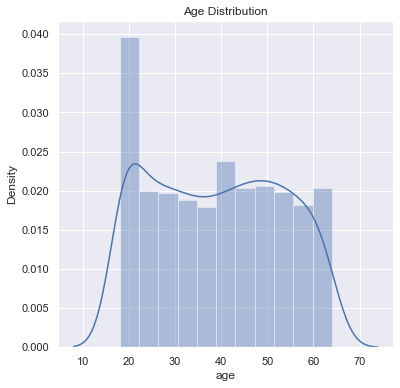

In [8]:
#1. Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data["age"])
plt.title("Age Distribution")
plt.show()

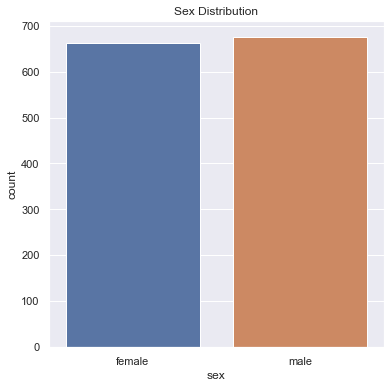

In [9]:
#2. Distribution of Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title("Sex Distribution")
plt.show()

In [10]:
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


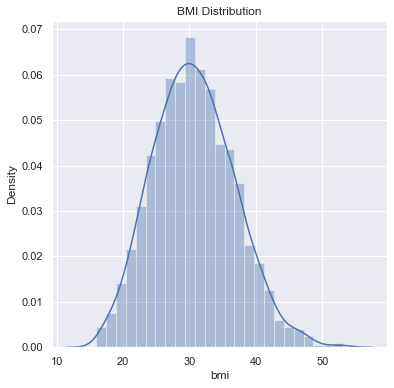

In [11]:
#3. Distribution of BMI column
plt.figure(figsize=(6,6))
sns.distplot(insurance_data["bmi"])
plt.title("BMI Distribution")
plt.show()

#normal bmi range 18.5 to 24.9

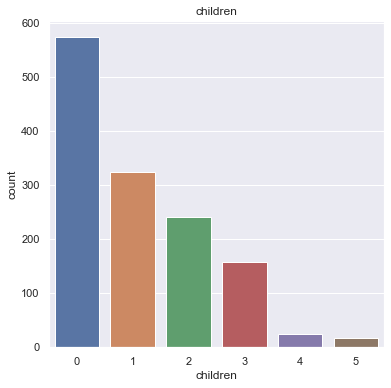

In [12]:
#4. Distribution of children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("children")
plt.show()

In [13]:
insurance_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

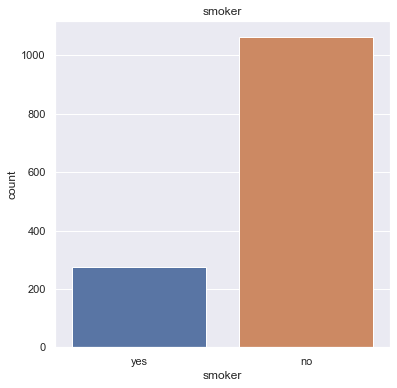

In [14]:
#5. Distribution of smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title("smoker")
plt.show()

In [15]:
insurance_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

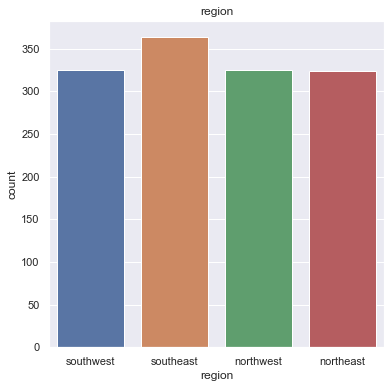

In [16]:
#6. Distribution of region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title("region")
plt.show()

In [17]:
insurance_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


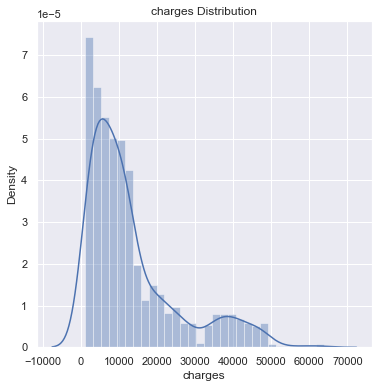

In [18]:
#7. Distribution of BMI column
plt.figure(figsize=(6,6))
sns.distplot(insurance_data["charges"])
plt.title("charges Distribution")
plt.show()

## Data preprocessing

In [19]:
#Encoding the categorical features
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [20]:
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [21]:
insurance_data.replace({'region':{'southeast':0,'southwest':1,"northwest":2,"northeast":3}}, inplace=True)

In [22]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [23]:
insurance_data.to_csv('insurance_cleaned.csv', index=False)

In [24]:
#Spliting data into features and targets
x=insurance_data.drop(columns="charges", axis=1)
y=insurance_data["charges"]
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [25]:
#split data into train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [26]:
#training model - linear regression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
#Model evaluation-prediction on training data
training_data_pred=regressor.predict(x_train)
print(training_data_pred)

[  781.23289463  9150.38548207 13163.38600896 ... 17329.28768831
  9545.84287714 14088.60244423]


In [28]:
#R Squared value
r2_train=metrics.r2_score(y_train,training_data_pred)
print("R squared value",r2_train)

R squared value 0.7518195459072954


In [29]:
#Model evaluation-prediction on test data
test_data_pred=regressor.predict(x_test)
print(test_data_pred)

[ 1820.75621886 11893.35566097 10391.48426582  2131.62301167
  8175.83419518 11016.30531453  3352.18872713  1013.79352548
 12023.09477086  9453.8581105  11467.3225898   4817.664947
 29808.20461479  -513.75717634 12754.46439804 13119.43189556
  4118.83414354  7731.48626043 29297.74067135  2699.14570484
 12329.22054394  2214.5652979  34452.34192694 32066.24540146
 30224.63592129  8944.2429203   2230.70212755 15188.75659902
  6532.69778856  1906.71098074  9402.89455638  5634.95908593
  4371.49314151  4823.49011099  9453.52337493  4528.76526399
 29818.9763023   6751.3046149  27557.85321987 13878.30367427
   117.41861964 28385.96859962  7697.94328125  1430.2691451
 10187.26558274  7986.59837739 11431.85182879  8096.73882633
 10698.62941741 13781.02808991  6083.58400067  -813.98261125
 26175.82891349 37020.38968178  7319.63150011 17878.3155211
  1345.13354978 10949.97441997  2116.48515909 33969.67493822
 11426.78563174   807.18181841  3853.10057308 35828.49578245
 -1115.23722126 14296.917871

In [30]:
#R Squared value
r2_test=metrics.r2_score(y_test,test_data_pred)
print("R squared value",r2_test)

R squared value 0.7454471618659976


## Building Predictive system

In [31]:
input_data = (30,0,35.3,0,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[30762.68249241]
The insurance cost is USD  30762.682492407614


## Saving trained model


In [32]:
import pickle

In [33]:
filename="trained_model.sav"
pickle.dump(regressor, open('trained_model.sav','wb'))

In [34]:
#loading the saved model
loaded_model=pickle.load(open("trained_model.sav","rb"))

In [35]:
input_data = (30,0,35.3,0,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =loaded_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[30762.68249241]
The insurance cost is USD  30762.682492407614
